## Feature Importance with Spectral Contrast
Using XGBoost to determine feature importance. Analyzes the features that are extracted for our datasets

Reference: https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

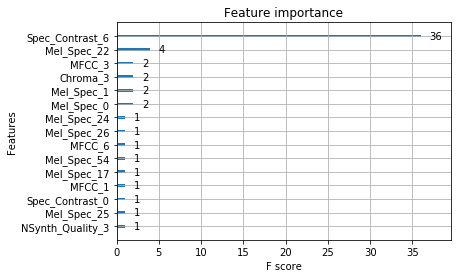

Accuracy: 99.06%


KeyError: 'weight'

In [2]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from numpy import sort
# load data
test_dataset = pd.read_csv('test.csv')
# split data into X and y
y_test = test_dataset['target']
x_test = test_dataset.drop(labels=['target'], axis=1)
x_test = x_test.drop(x_test.columns[0], axis=1)

valid_dataset = pd.read_csv('valid.csv')
# split data into X and y
y_valid = valid_dataset['target']
x_valid = valid_dataset.drop(labels=['target'], axis=1)
x_valid = x_valid.drop(x_valid.columns[0], axis=1)

# fit model no training data
model = XGBClassifier()
model.fit(x_valid, y_valid)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
# plot feature importance
plot_importance(model)
pyplot.show()

print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_valid)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_valid)
    # eval model
    select_X_test = selection.transform(x_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

## Feature Importance without Spectral Contrast
Spectral contrast (specifically spectral contrast 6) provides high prediction and skews the data, by using a dataset without spec_contrast_6 other features can be considered. Something to note, this provides higher accuracy from the XGBoost classifier.

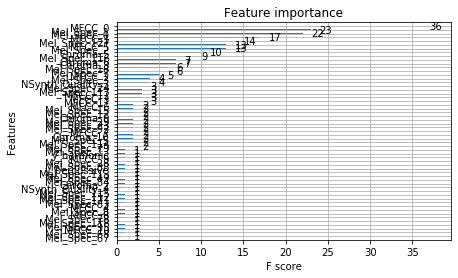

Accuracy: 99.53%


KeyError: 'weight'

In [3]:

# load data
test_dataset = pd.read_csv('No_spec_datatest.csv')
# split data into X and y
y_test = test_dataset['target']
x_test = test_dataset.drop(labels=['target'], axis=1)
x_test = x_test.drop(x_test.columns[0], axis=1)

valid_dataset = pd.read_csv('No_spec_datavalid.csv')
# split data into X and y
y_valid = valid_dataset['target']
x_valid = valid_dataset.drop(labels=['target'], axis=1)
x_valid = x_valid.drop(x_valid.columns[0], axis=1)

# fit model no training data
model = XGBClassifier()
model.fit(x_valid, y_valid)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
# plot feature importance
plot_importance(model)
pyplot.show()

print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_valid)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_valid)
    # eval model
    select_X_test = selection.transform(x_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))